## 제5장. 머신러닝 프로세스
## 제3절. 성능평가기법

### 1. 회귀분석

In [23]:
#Toy_DataSet: load_boston, load_iris, load_diabetes, load_digits, load_linnerud, load_wine, load_breast_cancer
import pandas as pd
from sklearn.datasets import load_diabetes
df = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
df['target'] = load_diabetes().target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size = 0.2)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (353, 10) 	X_test : (89, 10)
y_train : (353,) 	y_test : (89,)


In [25]:
## 선형회귀 모델링(회귀)
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
print('intercept:', LR.intercept_)
print('coef:', LR.coef_)

## 결과값 예측 (회귀)
y_pred = LR.predict(X_test)

intercept: 152.2375748449322
coef: [ -16.0425844  -245.76000018  528.50017435  309.41863094 -993.56463125
  618.97999253  156.40103282  206.59996328  794.99162646   96.47667774]


#### (1) MAE

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

42.29217641986238

#### (2) MSE

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

2688.9979336743295

#### (3) RMSE

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

51.85554872599778

#### (4) MSLE

In [29]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
msle

0.1805308356574915

#### (5) MAPE

In [30]:
import numpy as np
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape
mape = MAPE(y_test, y_pred)
mape

40.54181622219662

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.49749147115093695

### 2. 분류분석

In [32]:
#Toy_DataSet: load_boston, load_iris, load_diabetes, load_digits, load_linnerud, load_wine, load_breast_cancer
import pandas as pd
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size = 0.2)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (455, 30) 	X_test : (114, 30)
y_train : (455,) 	y_test : (114,)


In [34]:
## K-NN 분류 모델링(분류)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

# 테스트 데이터셋 예측
y_pred = KNN.predict(X_test)

#### (1) 정확도

In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8947368421052632

#### (2) 혼동행렬

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  9],
       [ 3, 64]], dtype=int64)

#### (3) 정밀도와 재현율
>타겟이 여러 개의 클래스가 있는 경우에는 "average" 설정 없으면 error 발생함.)  
>ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [41]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.8767123287671232

In [42]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9552238805970149

#### (4) F1 스코어
>타겟이 여러 개의 클래스가 있는 경우에는 "average" 설정 없으면 error 발생함.)  
>ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [43]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.9142857142857143

#### (5) ROC 곡선과 AUC 스코어

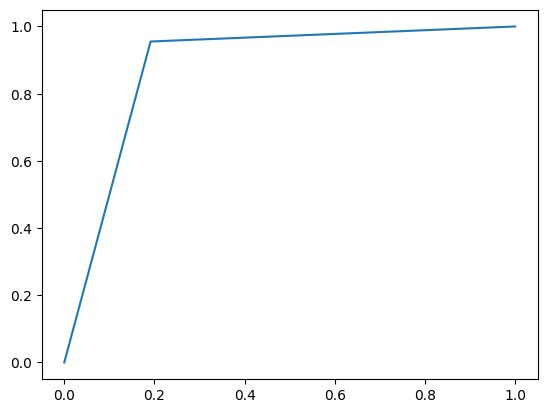

In [44]:
from sklearn.metrics import roc_curve
# FPR, TPR, Threshold 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)

# ROC 곡선 그리기
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

In [45]:
### AUC 스코어
from sklearn.metrics import roc_curve, auc
# FPR, TPR, Threshold 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)

auc = auc(fpr, tpr)
auc

0.8818672594474437